## Assignment on preprocessing

Do the following on titanic dataset:

1. Load the dataset into python environment.

2. Make ‘PassengerId’ as the index column.

3. Check the basic details of the dataset.

4. Fill in all the missing values present in all the columns in the dataset.

5. Check and handle outliers in at least 3 columns in the dataset.

6. Do min max scaling on the feature set (Take ‘Survived’ as target).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the dataset into python environment.

In [2]:
df = pd.read_csv(r"C:\Users\ALFRED\Downloads\titanic_dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Make ‘PassengerId’ as the index column.

In [4]:
df = pd.read_csv(r"C:\Users\ALFRED\Downloads\titanic_dataset.csv", index_col = "PassengerId")

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Check the basic details of the dataset.

In [6]:
df.shape

(891, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

4. Fill in all the missing values present in all the columns in the dataset.

In [10]:
df.isna().sum()  

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

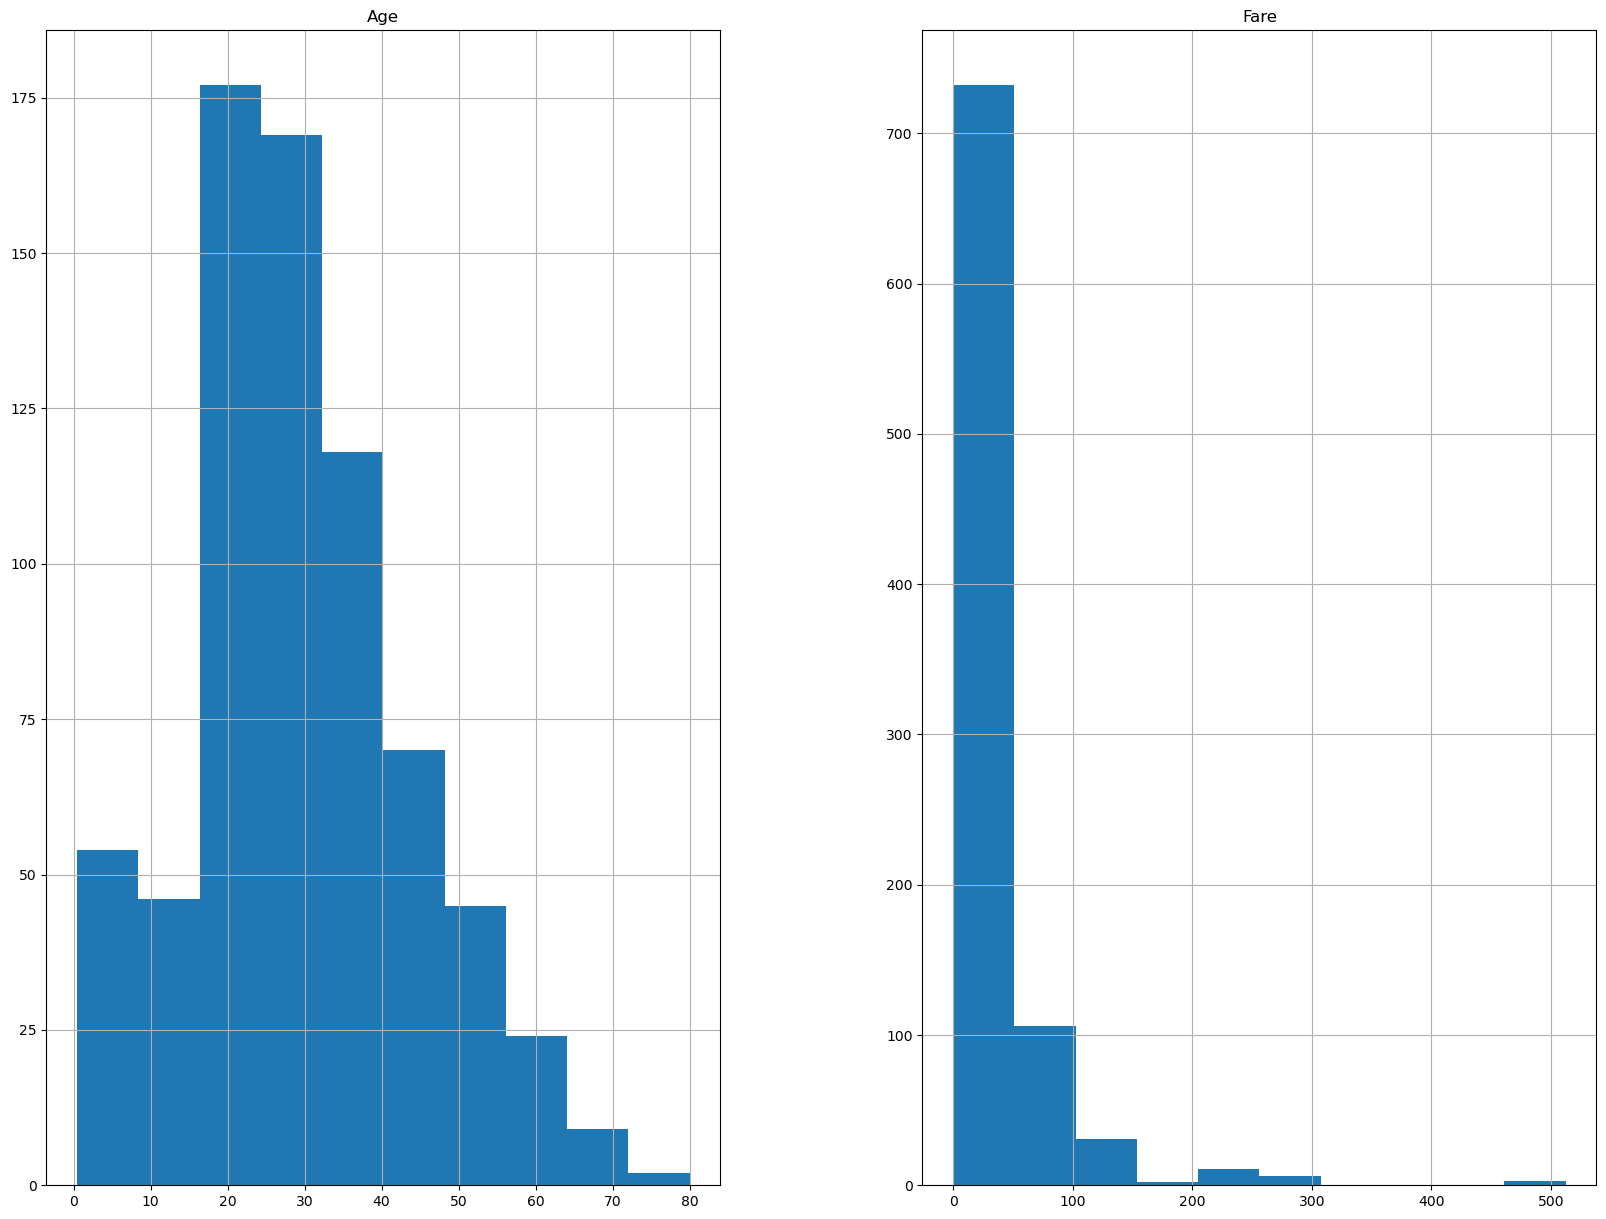

In [11]:
freqgraph = df.select_dtypes(include=['float'])
freqgraph.hist(figsize = (20,15))
plt.show()

In [12]:
df['Age'].fillna(round(df['Age'].mean(),1), inplace=True)      # replacing missing values in Age column using mean

In [13]:
for col in ['Cabin', 'Embarked']:
    df[col] = df[col].fillna(df[col].mode()[0])    # replacing missing values in Cabin and Embarked column using mode

In [14]:
df.isna().sum()   # every missing value is replaced respectively.

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset.

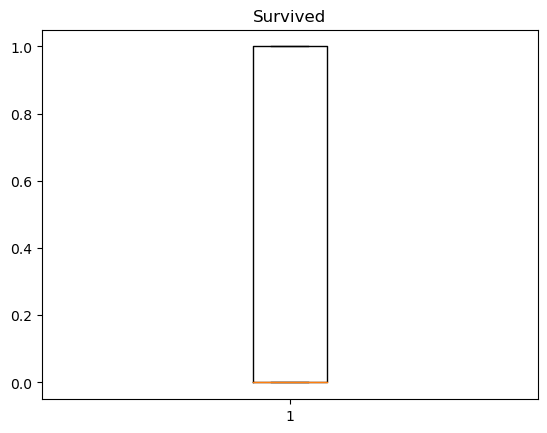

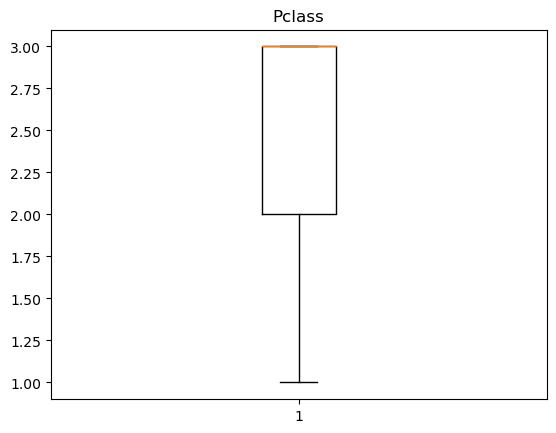

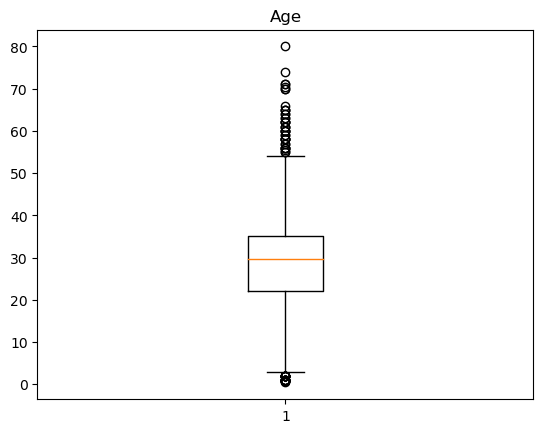

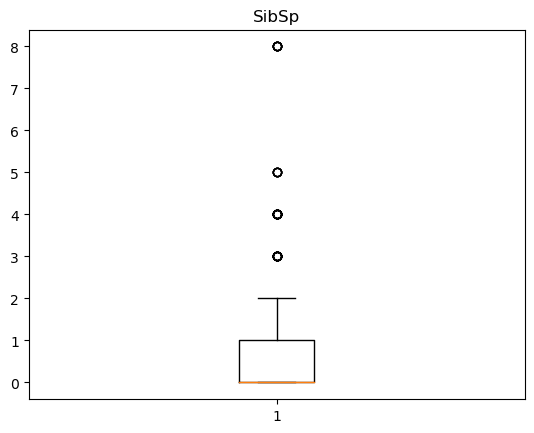

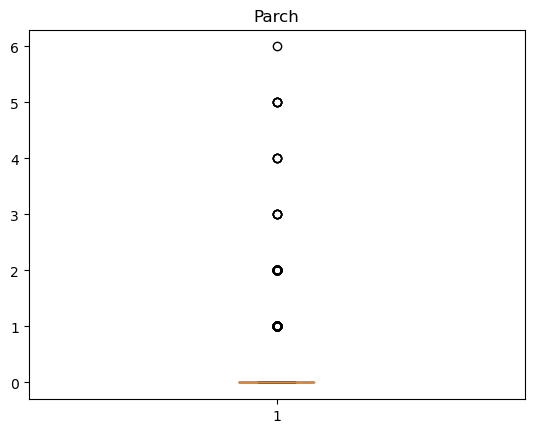

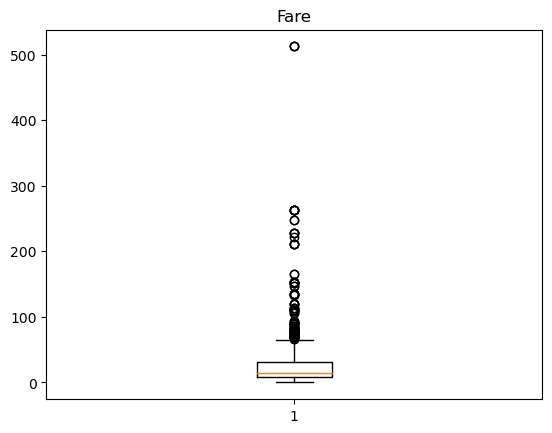

In [15]:
num_col = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for i in num_col:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)           # Box plots to find about the outliers.

In [16]:
# Here, 'Age', 'SibSp', 'Parch', 'Fare' all have outliers. We are handling 'Age', 'SibSp', and 'Fare'.

In [17]:
# Outliers of 'SibSp' are trimmed.

In [18]:
Q1 = np.percentile(df['SibSp'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['SibSp'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df['SibSp'], 75, interpolation = 'midpoint')

C:\Users\ALFRED\AppData\Local\Temp\ipykernel_2476\3445031565.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['SibSp'], 25, interpolation = 'midpoint')
C:\Users\ALFRED\AppData\Local\Temp\ipykernel_2476\3445031565.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(df['SibSp'], 50, interpolation = 'midpoint')
C:\Users\ALFRED\AppData\Local\Temp\ipykernel_2476\3445031565.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 

In [19]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [20]:
df['SibSp'].median()

0.0

In [21]:
IQR = Q3 - Q1

In [22]:
print(IQR)

1.0


In [23]:
up_lim = Q3+1.5*IQR
low_lim = Q1 - 1.5*IQR

In [24]:
print(up_lim)
print(low_lim)

2.5
-1.5


In [25]:
outliers = []
for x in df['SibSp']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [26]:
outliers

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [27]:
ind1 = df['SibSp']> up_lim
df.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [28]:
df.drop([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160, 165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 
         279, 325, 342, 375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
         793, 814, 820, 825, 847, 851, 864], inplace = True)

In [29]:
df.shape

(845, 11)

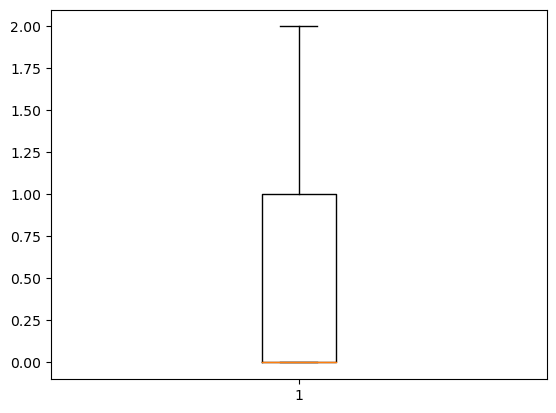

In [30]:
plt.boxplot(df['SibSp'])
plt.show()

In [31]:
# Outliers of 'Age' are capped and floored.

In [32]:
Q1 = np.percentile(df['Age'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['Age'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df['Age'], 75, interpolation = 'midpoint')

C:\Users\ALFRED\AppData\Local\Temp\ipykernel_2476\1684468193.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Age'], 25, interpolation = 'midpoint')
C:\Users\ALFRED\AppData\Local\Temp\ipykernel_2476\1684468193.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(df['Age'], 50, interpolation = 'midpoint')
C:\Users\ALFRED\AppData\Local\Temp\ipykernel_2476\1684468193.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'hig

In [33]:
print(Q1)
print(Q2)
print(Q3)

23.0
29.7
36.0


In [34]:
df['Age'].median()

29.7

In [35]:
IQR = Q3 - Q1
print(IQR)

13.0


In [36]:
up_lim = Q3+1.5*IQR
low_lim = Q1 - 1.5*IQR

In [37]:
print(up_lim)
print(low_lim)

55.5
3.5


In [38]:
outliers = []
for x in df['Age']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [39]:
outliers

[58.0,
 66.0,
 3.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 61.0,
 1.0,
 56.0,
 1.0,
 3.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 3.0,
 60.0,
 1.0,
 3.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [40]:
df['Age']=np.where(df['Age']>up_lim,up_lim, np.where(df['Age']<low_lim,low_lim,df['Age']))

In [41]:
df.shape

(845, 11)

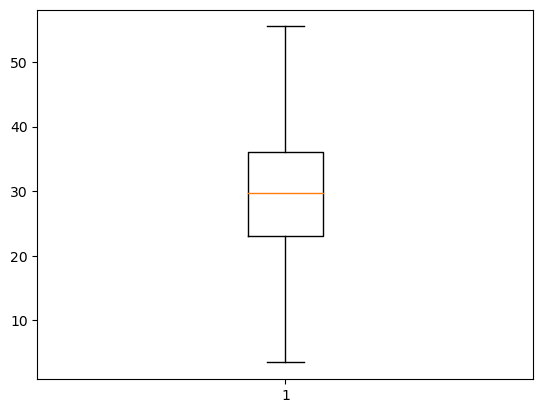

In [42]:
plt.boxplot(df['Age'])
plt.show()

In [43]:
# Outliers of 'Fare' are capped and floored.

In [44]:
Q1 = np.percentile(df['Fare'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['Fare'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df['Fare'], 75, interpolation = 'midpoint')

C:\Users\ALFRED\AppData\Local\Temp\ipykernel_2476\3191469563.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Fare'], 25, interpolation = 'midpoint')
C:\Users\ALFRED\AppData\Local\Temp\ipykernel_2476\3191469563.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(df['Fare'], 50, interpolation = 'midpoint')
C:\Users\ALFRED\AppData\Local\Temp\ipykernel_2476\3191469563.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'h

In [45]:
print(Q1)
print(Q2)
print(Q3)

7.8958
13.0
30.0


In [46]:
df['Fare'].median()

13.0

In [47]:
IQR = Q3 - Q1
print(IQR)

22.1042


In [48]:
up_lim = Q3+1.5*IQR
low_lim = Q1 - 1.5*IQR

In [49]:
print(up_lim)
print(low_lim)

63.1563
-25.2605


In [50]:
outliers = []
for x in df['Fare']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [51]:
outliers

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 146.5208,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 80.0,
 83.1583,
 89.1042,
 164.8667,
 83.1583]

In [52]:
df['Fare']=np.where(df['Fare']>up_lim,up_lim,np.where(df['Fare']<low_lim,low_lim,df['Fare']))

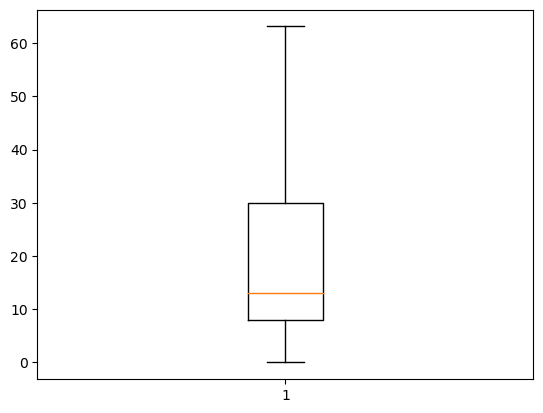

In [53]:
plt.boxplot(df['Fare'])
plt.show()

In [54]:
df.shape

(845, 11)

6. Do min max scaling on the feature set (Take ‘Survived’ as target).

In [55]:
X = df.drop(['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1) # X contains independent variables.

In [56]:
Y = df['Survived']

In [57]:
X.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,63.1563
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500


In [58]:
X.describe()   # Here minimum and maximum values vary largly from each other.

,Pclass,Age,SibSp,Parch,Fare
count,845.000000,845.000000,845.000000,845.000000,845.000000
mean,2.279290,30.245799,0.313609,0.317160,22.936517
std,0.840396,11.653882,0.530909,0.765829,19.735094
min,1.000000,3.500000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,29.700000,0.000000,0.000000,13.000000
75%,3.000000,36.000000,1.000000,0.000000,30.000000
max,3.000000,55.500000,2.000000,6.000000,63.156300


In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
min_max = MinMaxScaler()

In [61]:
X = min_max.fit_transform(X)

In [62]:
type(X)

numpy.ndarray

In [63]:
X = pd.DataFrame(X, columns = ['Pclass', 'Age','SibSp', 'Parch','Fare'])

In [64]:
X.describe()  # We scaled the maximum to 1 and minimum to 0

,Pclass,Age,SibSp,Parch,Fare
count,845.000000,845.000000,845.000000,845.000000,845.000000
mean,0.639645,0.514342,0.156805,0.052860,0.363171
std,0.420198,0.224113,0.265454,0.127638,0.312480
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.375000,0.000000,0.000000,0.125020
50%,1.000000,0.503846,0.000000,0.000000,0.205839
75%,1.000000,0.625000,0.500000,0.000000,0.475012
max,1.000000,1.000000,1.000000,1.000000,1.000000
